<a href="https://colab.research.google.com/github/shiling2007/Python-/blob/main/Random_survival_data_from_a_hazard_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 

from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:100% !important; }</style>"))
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files
# files.download('/content/drive/MyDrive/Colab Notebooks/Lease Payment Formula.ipynb') 
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 999)
pd.set_option("max_colwidth", 500)
pd.options.display.float_format = '{:.5f}'.format
# try:
#  device_name = os.environ['COLAB_TPU_ADDR']
#  TPU_ADDRESS = 'grpc://' + device_name
#  print('Found TPU at: {}'.format(TPU_ADDRESS))
# except KeyError:
#  print('TPU not found')
%load_ext autoreload
%autoreload 2

In [2]:
!pip install lifelines

     |████████████████████████████████| 348 kB 7.5 MB/s 
     |████████████████████████████████| 55 kB 2.7 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=261862d75f38e07cd68b295a7d00e5c731f5eba9fc1caef32b0404df89aa59c3
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [3]:
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels import api
from scipy.optimize import minimize
from scipy.stats import norm, uniform
from statsmodels.formula.api import probit
from lifelines import (KaplanMeierFitter, WeibullFitter,  NelsonAalenFitter, PiecewiseExponentialFitter, LogLogisticFitter, LogNormalFitter, CoxPHFitter, ExponentialFitter)
from scipy.stats import weibull_min, expon, randint , lognorm, norm, fisk

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#generated normal baseline with a propotion survival data

In [ ]:
#log normal distribution
# scale, s=np.exp(4), 1

# print ('entropy:','\t', lognorm.entropy( s, loc=0, scale=scale))
# print ('median:','\t', lognorm.median( s, loc=0, scale=scale))
# print ('mean:','\t', lognorm.mean( s, loc=0, scale=scale))
# print ('std:','\t', lognorm.std( s, loc=0, scale=scale))
# print ('var:','\t', lognorm.var( s, loc=0, scale=scale))

# df_surv=pd.DataFrame([days  for days in np.arange(1,4000,1)], columns=['days'])
# df_surv['pdf']=lognorm.pdf(df_surv.days, s, loc=0, scale=scale)
# df_surv['cdf']=lognorm.cdf(df_surv.days, s, loc=0, scale=scale)
# df_surv['sf']=lognorm.sf(df_surv.days, s, loc=0, scale=scale)
# df_surv['hazard']=df_surv.pdf/(df_surv.sf)
# df_surv['hazard2']=df_surv.pdf/(1-df_surv.cdf)


In [ ]:
# np.log(90.01713130052181) - 1/2 * s **2

In [4]:
pd.options.display.float_format = '{:.5f}'.format

In [5]:
#log normal distribution
scale, s=np.exp(5), 1

factor=0.15

print ('entropy:','\t', lognorm.entropy( s, loc=0, scale=scale))
print ('median:','\t', lognorm.median( s, loc=0, scale=scale))
print ('mean:','\t', lognorm.mean( s, loc=0, scale=scale))
print ('std:','\t', lognorm.std( s, loc=0, scale=scale))
print ('var:','\t', lognorm.var( s, loc=0, scale=scale))

df_surv=pd.DataFrame([q  for q in np.arange(0.001,1,0.001)], columns=['quantile'])
df_surv['days']=lognorm.ppf(df_surv['quantile'], s, loc=0, scale=scale)
df_surv['pdf']=lognorm.pdf(df_surv.days, s, loc=0, scale=scale)
df_surv['cdf']=lognorm.cdf(df_surv.days, s, loc=0, scale=scale)
df_surv['sf']=lognorm.sf(df_surv.days, s, loc=0, scale=scale)
df_surv['hazard']=df_surv.pdf/(df_surv.sf)
df_surv['hazard2']=df_surv.hazard*(1+factor)
df_surv['hazard_log']=np.log(df_surv.hazard)
df_surv['hazard2_log']=np.log(df_surv.hazard2)

df_surv['diff_log_hz']=df_surv['hazard2_log']-df_surv['hazard_log']
df_surv['diff_log_hz']

entropy: 	 6.418938533204672
median: 	 148.4131591025766
mean: 	 244.69193226422038
std: 	 320.75013593731506
var: 	 102880.64970380608


0     0.13976
1     0.13976
2     0.13976
3     0.13976
4     0.13976
        ...  
994   0.13976
995   0.13976
996   0.13976
997   0.13976
998   0.13976
Name: diff_log_hz, Length: 999, dtype: float64

In [6]:
from scipy import integrate
x = df_surv['days']
y = df_surv.hazard
y_int = integrate.cumtrapz(y, x, initial=df_surv['quantile'][0])
df_surv['hazard_i']=y_int
df_surv['sf_cumsum_i']=np.exp(-df_surv['hazard_i'])

y = df_surv.hazard2
y_int = integrate.cumtrapz(y, x, initial=df_surv['quantile'][0])
df_surv['hazard_i2']=y_int
df_surv['sf_cumsum_i2']=np.exp(-df_surv['hazard_i2'])

df_surv[['quantile','days','hazard','hazard2','hazard_i','hazard_i2','sf','sf_cumsum_i','sf_cumsum_i2']]

,quantile,days,hazard,hazard2,hazard_i,hazard_i2,sf,sf_cumsum_i,sf_cumsum_i2
0,0.00100,6.75152,0.00050,0.00057,0.00100,0.00100,0.99900,0.99900,0.99900
1,0.00200,8.34647,0.00076,0.00088,0.00101,0.00116,0.99800,0.99900,0.99884
2,0.00300,9.50881,0.00097,0.00111,0.00201,0.00231,0.99700,0.99799,0.99769
3,0.00400,10.46389,0.00114,0.00131,0.00301,0.00346,0.99600,0.99699,0.99654
4,0.00500,11.29286,0.00129,0.00148,0.00402,0.00462,0.99500,0.99599,0.99539
...,...,...,...,...,...,...,...,...,...
994,0.99500,1950.47713,0.00148,0.00171,5.29755,6.09218,0.00500,0.00500,0.00226
995,0.99600,2104.99803,0.00141,0.00162,5.52081,6.34893,0.00400,0.00400,0.00175
996,0.99700,2316.42745,0.00132,0.00151,5.80873,6.68004,0.00300,0.00300,0.00126
997,0.99800,2639.01690,0.00120,0.00138,6.21484,7.14707,0.00200,0.00200,0.00079


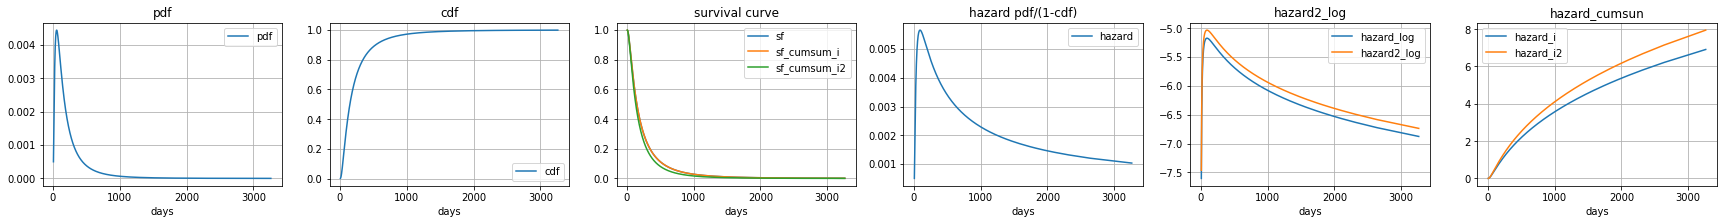

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(30, 3))
df_surv.plot.line(ax=ax[0], x='days', y='pdf', grid=True, title='pdf')
df_surv.plot.line(ax=ax[1], x='days', y='cdf', grid=True, title='cdf')
df_surv.plot.line(ax=ax[2], x='days', y='sf', grid=True, title='survival curve')
df_surv.plot.line(ax=ax[2], x='days', y='sf_cumsum_i', grid=True, title='survival curve')
df_surv.plot.line(ax=ax[2], x='days', y='sf_cumsum_i2', grid=True, title='survival curve')
df_surv.plot.line(ax=ax[3], x='days', y='hazard', grid=True, title='hazard pdf/(1-cdf)')
df_surv.plot.line(ax=ax[4], x='days', y='hazard_log', grid=True, title='hazard_log')
df_surv.plot.line(ax=ax[4], x='days', y='hazard2_log', grid=True, title='hazard2_log')
df_surv.plot.line(ax=ax[5], x='days', y='hazard_i', grid=True, title='hazard_cumsun')
df_surv.plot.line(ax=ax[5], x='days', y='hazard_i2', grid=True, title='hazard_cumsun')

In [8]:
# build a dictionary from cdf
import bisect

def value_at(n):
    index = bisect.bisect_left(limits, n)
    return values[index]


In [9]:
# prob_sf=df_surv[['sf_cumsum_i','days']].drop_duplicates(keep='first').copy()
# prob_sf=prob_sf.sort_values(by=['sf_cumsum_i'])

prob_sf=df_surv.groupby('sf_cumsum_i')['days'].mean().to_frame().reset_index()

limits=np.array(prob_sf.sf_cumsum_i)
values=np.array(prob_sf.days)

%time sample=pd.DataFrame(np.minimum(np.random.rand(5000),0.999), columns=['sf_cumsum_i'])
%time sample['days']=np.array([value_at(v) for v in sample.sf_cumsum_i])

CPU times: user 538 µs, sys: 83 µs, total: 621 µs
Wall time: 632 µs
CPU times: user 28.8 ms, sys: 93 µs, total: 28.9 ms
Wall time: 65.4 ms


In [10]:
# prob_sf=df_surv[['sf_cumsum_i2','days']].drop_duplicates(keep='first').copy()
# prob_sf=prob_sf.sort_values(by=['sf_cumsum_i2'])

prob_sf=df_surv.groupby('sf_cumsum_i2')['days'].mean().to_frame().reset_index()
limits=np.array(prob_sf.sf_cumsum_i2)
values=np.array(prob_sf.days)

%time sample2=pd.DataFrame(np.minimum(np.random.rand(5000),0.999), columns=['sf_cumsum_i'])
%time sample2['days']=np.array([value_at(v) for v in sample.sf_cumsum_i])

CPU times: user 462 µs, sys: 72 µs, total: 534 µs
Wall time: 544 µs
CPU times: user 25.9 ms, sys: 0 ns, total: 25.9 ms
Wall time: 64.8 ms


In [24]:
sample['days_censored']=np.minimum(sample.days, 500)
sample2['days_censored']=np.minimum(sample2.days, 500)

In [25]:
sample.describe()

,sf_cumsum_i,days,days_censored
count,5000.00000,5000.00000,5000.00000
mean,0.49029,252.84123,204.06294
std,0.28907,311.95420,154.69145
min,0.00016,6.75152,6.75152
25%,0.23806,76.79675,76.79675
50%,0.48529,154.10101,154.10101
75%,0.74482,301.97097,301.97097
max,0.99900,3262.44537,500.00000


In [26]:
sample2.describe()

,sf_cumsum_i,days,days_censored
count,5000.00000,5000.00000,5000.00000
mean,0.50554,214.66064,184.69959
std,0.28929,252.10944,145.70091
min,0.00033,6.75152,6.75152
25%,0.25989,69.95940,69.95940
50%,0.50383,136.61773,136.61773
75%,0.75954,259.81533,259.81533
max,0.99900,3262.44537,500.00000


In [27]:
def _ll_survival(y, beta,censored):
    mu=beta[0]
    sigma=beta[1]
    # X=np.where(y==censored, 0, 1)
    # Y=np.log(y)
    pdf=lognorm.pdf(y ,sigma, loc=0, scale=np.exp(mu))
    cdf=lognorm.cdf(y, sigma, loc=0, scale=np.exp(mu))   
    prob=(y<censored)*pdf + (y>=censored)*(1-cdf)
    ll=np.log(prob)
    return ll.sum() 

class MySurvical_mle(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwds):
      super(MySurvical_mle, self).__init__(endog, exog,  **kwds)

    def nloglikeobs(self, params):
	    beta = params
	    ll = _ll_survival(self.endog, beta,censored)
	    return -ll

    def fit(self, start_params=None, maxiter=10000, maxfun=5000,  **kwds):
    # we have one additional parameter and we need to add it for summary
      # self.exog_names.append('mu') ;self.exog_names.append('sigma');
      if start_params == None:
        # start_params =np.array([0.5,2,0,1,4,2])
        start_params =np.array([1,1])
        return super(MySurvical_mle, self).fit(start_params=start_params, maxiter=maxiter, maxfun=maxfun, method='nm', **kwds)

y=sample.days_censored
censored=500
model_survival=MySurvical_mle(y).fit()
print(model_survival.summary())
print(model_survival.params)

y=sample2.days_censored
censored=500
model_survival2=MySurvical_mle(y).fit()
print(model_survival2.summary())
print(model_survival2.params)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


Optimization terminated successfully.
         Current function value: 5.595880
         Iterations: 49
         Function evaluations: 94
                            MySurvical_mle Results                            
Dep. Variable:          days_censored   Log-Likelihood:                -27979.
Model:                 MySurvical_mle   AIC:                               nan
Method:            Maximum Likelihood   BIC:                               nan
Date:                Tue, 28 Dec 2021                                         
Time:                        15:13:16                                         
No. Observations:                5000                                         
Df Residuals:                     NaN                                         
Df Model:                         NaN                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

In [28]:
scale, s=np.exp(model_survival.params[0]), model_survival.params[1]

df_surv=pd.DataFrame([q  for q in np.arange(0.001,1,0.001)], columns=['quantile'])
df_surv['days']=lognorm.ppf(df_surv['quantile'], s, loc=0, scale=scale)
df_surv['pdf']=lognorm.pdf(df_surv.days, s, loc=0, scale=scale)
df_surv['cdf']=lognorm.cdf(df_surv.days, s, loc=0, scale=scale)
df_surv['sf']=lognorm.sf(df_surv.days, s, loc=0, scale=scale)
df_surv['hazard']=df_surv.pdf/(df_surv.sf)
df_surv['hazard_log']=np.log(df_surv.pdf/(df_surv.sf))
df_surv['hazard2']=df_surv.hazard*(1+factor)
df_surv['hazard2_log']=np.log(df_surv.hazard2)

df_surv['hazard2_log']-df_surv['hazard_log']


0     0.13976
1     0.13976
2     0.13976
3     0.13976
4     0.13976
        ...  
994   0.13976
995   0.13976
996   0.13976
997   0.13976
998   0.13976
Length: 999, dtype: float64

In [29]:
scale, s=np.exp(model_survival2.params[0]), model_survival2.params[1]

df_surv2=pd.DataFrame([q  for q in np.arange(0.001,1,0.001)], columns=['quantile'])
df_surv2['days']=lognorm.ppf(df_surv2['quantile'], s, loc=0, scale=scale)
df_surv2['pdf']=lognorm.pdf(df_surv2.days, s, loc=0, scale=scale)
df_surv2['cdf']=lognorm.cdf(df_surv2.days, s, loc=0, scale=scale)
df_surv2['sf']=lognorm.sf(df_surv2.days, s, loc=0, scale=scale)
df_surv2['hazard']=df_surv2.pdf/(df_surv2.sf)
df_surv2['hazard_log']=np.log(df_surv2.pdf/(df_surv2.sf))



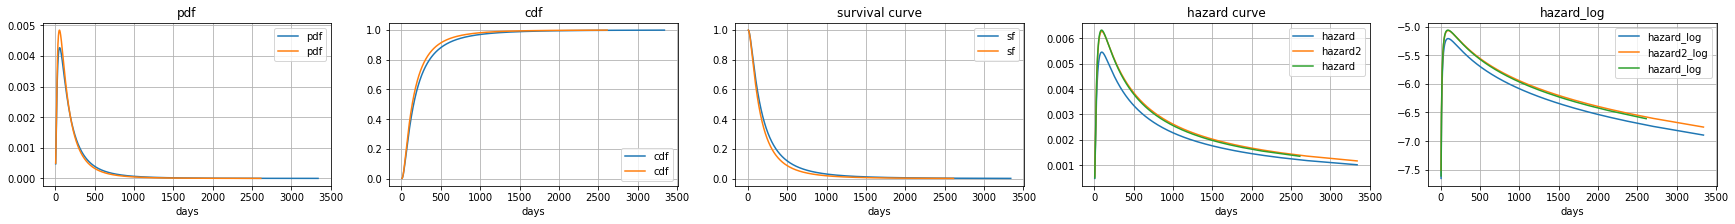

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(30, 3))
df_surv.plot.line(ax=ax[0], x='days', y='pdf', grid=True, title='pdf')
df_surv2.plot.line(ax=ax[0], x='days', y='pdf', grid=True, title='pdf')

df_surv.plot.line(ax=ax[1], x='days', y='cdf', grid=True, title='cdf')
df_surv2.plot.line(ax=ax[1], x='days', y='cdf', grid=True, title='cdf')

df_surv.plot.line(ax=ax[2], x='days', y='sf', grid=True, title='survival curve')
df_surv2.plot.line(ax=ax[2], x='days', y='sf', grid=True, title='survival curve')

df_surv.plot.line(ax=ax[3], x='days', y='hazard', grid=True, title='hazard curve')
df_surv.plot.line(ax=ax[3], x='days', y='hazard2', grid=True, title='hazard curve')
df_surv2.plot.line(ax=ax[3], x='days', y='hazard', grid=True, title='hazard curve')

df_surv.plot.line(ax=ax[4], x='days', y='hazard_log', grid=True, title='hazard_log')
df_surv.plot.line(ax=ax[4], x='days', y='hazard2_log', grid=True, title='hazard2_log')
df_surv2.plot.line(ax=ax[4], x='days', y='hazard_log', grid=True, title='hazard_log')


In [31]:
df2=sample.append(sample2).reset_index()
df2['flag']=1*(df2.index>5000)
df2['event']=1*(df2.days<500)
df2['days_censor']=np.where(df2['event']==1, df2['days'], 500 )

flag
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: days_censor, dtype: object

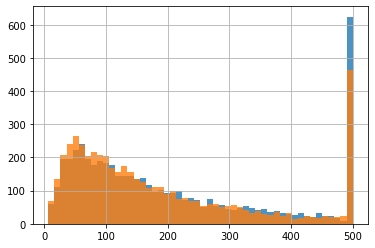

In [34]:
df2.groupby('flag')['days_censor'].hist(bins=50, alpha = 0.8)

In [35]:
df2.describe()

,index,sf_cumsum_i,days,days_censored,flag,event,days_censor
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,2499.50000,0.49791,233.75094,194.38127,0.49990,0.89440,194.38127
std,1443.44782,0.28926,284.24238,150.56754,0.50002,0.30734,150.56754
min,0.00000,0.00016,6.75152,6.75152,0.00000,0.00000,6.75152
25%,1249.75000,0.24904,73.94452,73.94452,0.00000,1.00000,73.94452
50%,2499.50000,0.49436,144.37637,144.37637,0.00000,1.00000,144.37637
75%,3749.25000,0.75168,280.67339,280.67339,1.00000,1.00000,280.67339
max,4999.00000,0.99900,3262.44537,500.00000,1.00000,1.00000,500.00000


In [36]:
# df2

In [37]:
df_reg=df2[['event','days_censor', 'flag' ] ]
from lifelines import CoxPHFitter
%time cph = CoxPHFitter()
%time cph.fit(df_reg, 'days_censor', 'event')
%time cph.print_summary(model="untransformed variables", decimals=6)

cph.check_assumptions(df_reg, p_value_threshold=0.05, show_plots=True)

CPU times: user 31 µs, sys: 2 µs, total: 33 µs
Wall time: 38.1 µs
CPU times: user 836 ms, sys: 64.3 ms, total: 900 ms
Wall time: 836 ms


<lifelines.CoxPHFitter: fitted with 10000 total observations, 1056 right-censored observations>
             duration col = 'days_censor'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 10000
number of events observed = 8944
   partial log-likelihood = -75786.215658
         time fit was run = 2021-12-28 15:17:05 UTC
                    model = untransformed variables

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
flag      0.140990   1.151413   0.021168         0.099502         0.182478             1.104620             1.200188

                 z      p   -log2(p)
covariate                           
flag      6.660544 <5e-07  35.093280
---
Concordance = 0.517645
Partial AIC = 151574.431317
log-likelihood ratio test = 44.365882 on 1 df
-log2(p) of ll-ratio test = 35.095518

CPU times: user 116 ms, sys: 1.98 ms, total: 118 ms
Wall time: 120 ms
Proportional hazard assumption looks okay.


[]

In [ ]:
# import numpy
# import scipy.integrate

# class HazardSampler(object):
#     def __init__(self, hazard, start=0.0, step=None):
#         self.hazard = hazard
#         if step is None:
#             h0 = hazard(0.0)
#             if h0 > 0:
#                 step = 2.0 / hazard(0.0)
#             else:
#                 # Reasonable default.  Not efficient in some cases.
#                 step = 200.0 / scipy.integrate.quad(hazard, 0.0, 100.0) 
#         self.cumulative_hazard = CumulativeHazard(hazard)
#         self.survival_function = SurvivalFunction(self.cumulative_hazard)
#         self.cdf = Cdf(self.survival_function)
#         self.inverse_cdf = InverseCdf(self.cdf, start=start, step=step, lower=0.0)
#         self.sampler = InversionTransformSampler(self.inverse_cdf)

#     def draw(self):
#         return self.sampler.draw()

# class InversionTransformSampler(object):
#     def __init__(self, inverse_cdf):
#         self.inverse_cdf = inverse_cdf

#     def draw(self):
#         u = numpy.random.uniform(0,1)
#         return self.inverse_cdf(u)

# class CumulativeHazard(object):
#     def __init__(self, hazard):
#         self.hazard = hazard

#     def __call__(self, t):
#         return scipy.integrate.quad(self.hazard, 0.0, t)[0]

# class SurvivalFunction(object):
#     def __init__(self, cumulative_hazard):
#         self.cumulative_hazard = cumulative_hazard

#     def __call__(self, t):
#         return numpy.exp(-self.cumulative_hazard(t))

# class Cdf(object):
#     def __init__(self, survival_function):
#         self.survival_function = survival_function

#     def __call__(self, t):
#         return 1.0 - self.survival_function(t)

# class InverseCdf(object):
#     def __init__(self, cdf, start, step, precision=1e-8, lower=float('-inf'),
#                  upper=float('inf')):
#         self.cdf = cdf
#         self.precision = precision
#         self.start = start
#         self.step = step
#         self.lower = lower
#         self.upper = upper

#     def __call__(self, p):
#         last_diff = None
#         step = self.step
#         current = self.start
#         while True:
#             value = self.cdf(current)
#             diff = value - p
#             if abs(diff) < self.precision:
#                 break
#             elif diff < 0:
#                 current = min(current + step, self.upper)
#                 if last_diff is not None and last_diff > 0:
#                     step *= 0.5
#                 last_diff = diff
#             else:
#                 current = max(current - step, self.lower)
#                 if last_diff is not None and last_diff < 0:
#                     step *= 0.5
#                 last_diff = diff
#         return current

In [ ]:
# import numpy
# # from samplers import HazardSampler

# # Set a random seed and sample size
# numpy.random.seed(1)
# m = 1000

# # Use this totally crazy hazard function
# hazard = lambda t: numpy.exp(numpy.sin(t) - 2.0)

# # Sample failure times from the hazard function
# sampler = HazardSampler(hazard)
# failure_times = numpy.array([sampler.draw() for _ in range(m)])

# # Apply some non-informative right censoring, just to demonstrate how it's done
# censor_times = numpy.random.uniform(0.0, 25.0, size=m)
# y = numpy.minimum(failure_times, censor_times)
# c = 1.0 * (censor_times > failure_times)

# # Make some plots of the simulated data
# from matplotlib import pyplot
# from statsmodels.distributions import ECDF

# # Plot a histogram of failure times from this hazard function
# pyplot.hist(failure_times, bins=50)
# pyplot.title('Uncensored Failure Times')
# pyplot.savefig('uncensored_hist.png')
# pyplot.show()

# # Plot a histogram of censored failure times from this hazard function
# pyplot.hist(y, bins=50)
# pyplot.title('Non-informatively Right Censored Failure Times')
# pyplot.savefig('censored_hist.png')
# pyplot.show()

# # Plot the empirical survival function (based on the censored sample) against the actual survival function
# t = numpy.arange(0,20.0,.1)
# S = numpy.array([sampler.survival_function(t[i]) for i in range(len(t))])
# S_hat = 1.0 - ECDF(failure_times)(t)
# pyplot.figure()
# pyplot.title('Survival Function Comparison')
# pyplot.plot(t, S, 'r', lw=3, label='True survival function')
# pyplot.plot(t, S_hat, 'b--', lw=3, label='Sampled survival function (1 - ECDF)')
# pyplot.legend()
# pyplot.xlabel('Time')
# pyplot.ylabel('Proportion Still Alive')
# pyplot.savefig('survival_comp.png')
# pyplot.show()
